In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import random
import shutil

In [3]:
data_path = '../Data/full dataset'
data_path_1000 = '../Data/Dataset 1000'
data_path_200 = '../Data/Dataset 200'
data_path_500 = '../Data/Dataset 500'
data_path_800 = '../Data/Dataset 800'
val_data_path = '../Data/validation dataset'
figures_output_path = '../Outputs/figures'
csv_outputs ='../Outputs/csv'
models_path ='../Models/'

In [ ]:
labels_df = pd.read_csv(os.path.join(data_path,"trainLabels.csv"))

In [ ]:
class_balance = labels_df.groupby("level").count()

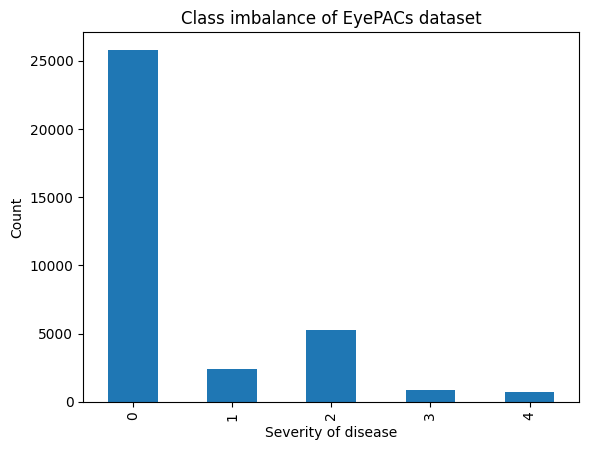

In [ ]:

# Plot class imbalance
class_balance.plot.bar(legend=False)
plt.title("Class imbalance of EyePACs dataset")
plt.ylabel("Count")
plt.xlabel("Severity of disease")
plt.savefig(os.path.join(figures_output_path, "Class imbalance.jpg"))

In [ ]:
class_balance

,image
level,
0,25810
1,2443
2,5292
3,873
4,708


In [ ]:
image_dict = dict()
counter=0
for i in [0,1,2,3,4]:
    train_list = os.listdir(os.path.join(path, 'train',str(i)))

    img = cv2.imread(os.path.join(path, 'train', str(i),train_list[1]))
    scale_percent = 10 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)

    # resize image
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    b = img.copy()
    # set green and red channels to 0
    b[:, :, 1] = 0
    b[:, :, 2] = 0


    g = img.copy()
    # set blue and red channels to 0
    g[:, :, 0] = 0
    g[:, :, 2] = 0

    r = img.copy()
    # set blue and green channels to 0
    r[:, :, 0] = 0
    r[:, :, 1] = 0

    gray = img.copy()
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2GRAY)
    image_dict[str(i)] = [gray, b, g, r, img]

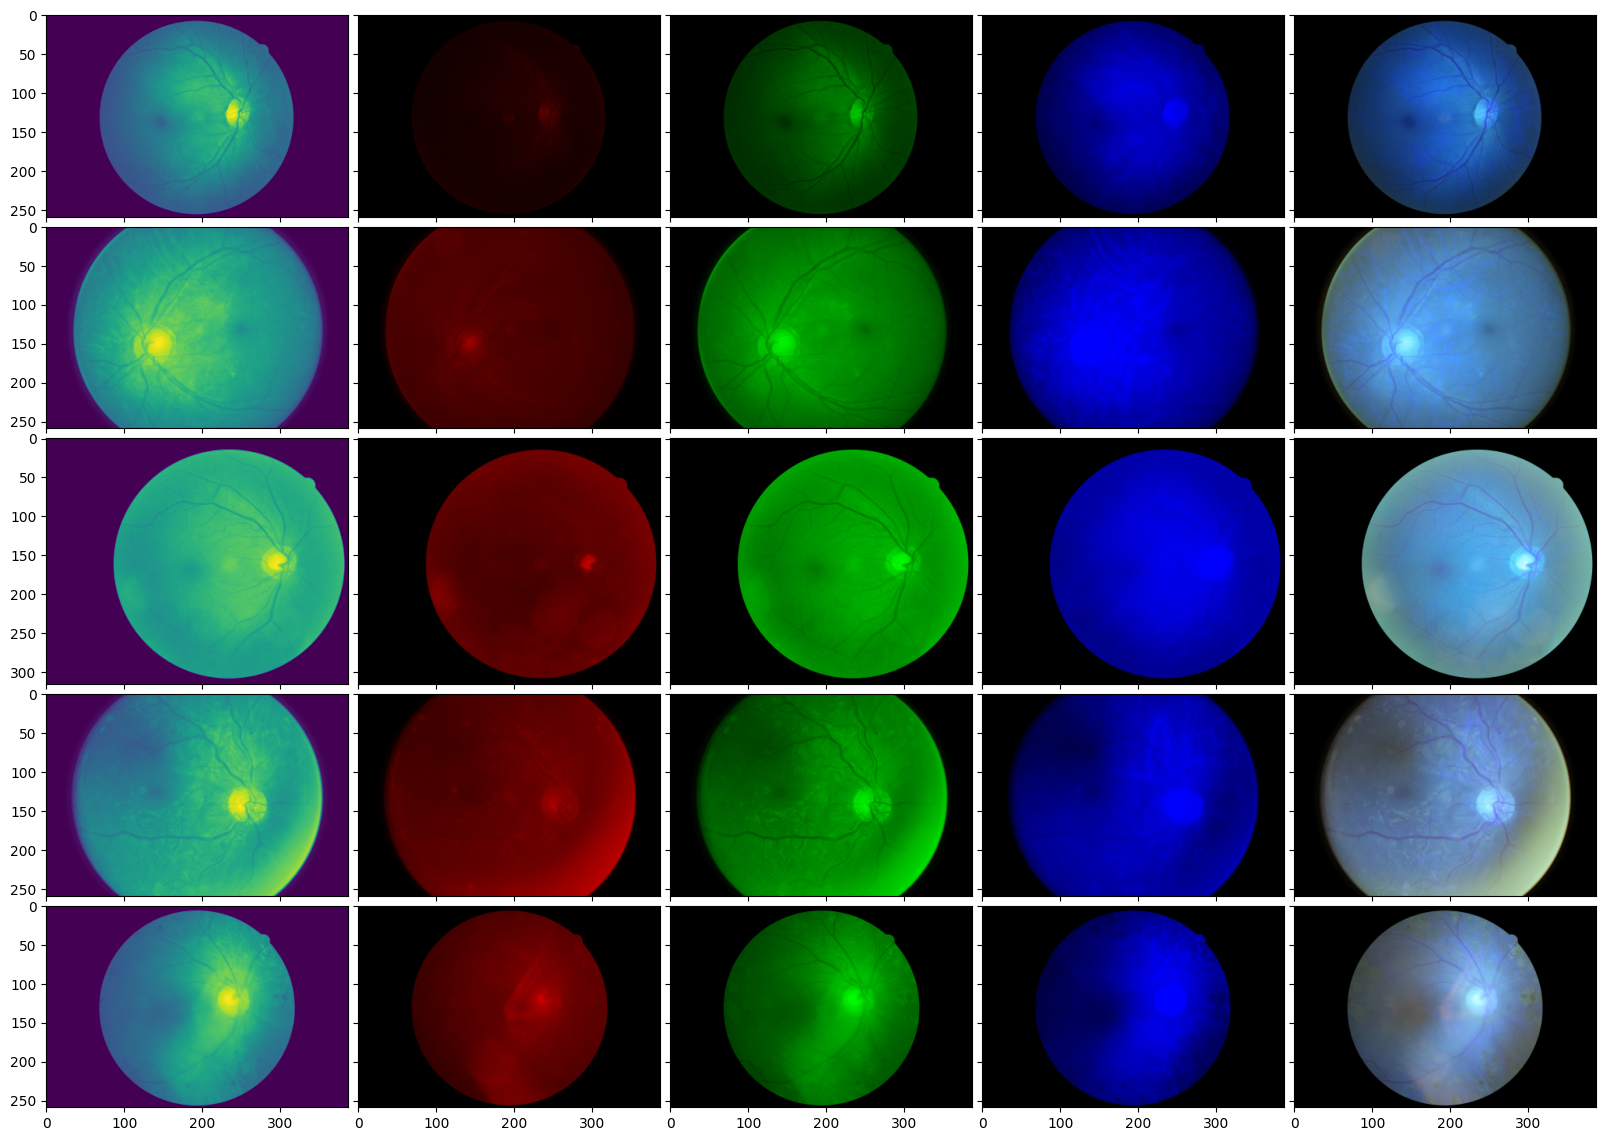

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(5,5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid,
                  image_dict['0'] + image_dict['1'] + image_dict['2']+ image_dict['3']+ image_dict['4']):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()
plt.savefig(os.path.join(figures_output_path, "Impact of channel on image.jpg"))

To normalise the images for the CNN the images must be analyised to determine the mean and standard deviation for each channel. As the whole dataset is very large, the validation dataset is used for this analysis

In [ ]:
red=np.array([])
green=np.array([])
blue =np.array([])
counter=0
for i in [0,1,2,3,4]:
    val_list = os.listdir(os.path.join(path, 'val',str(i)))
    for file in val_list[:1001]:
        img = cv2.imread(os.path.join(path, 'val', str(i),val_list[1]))
        scale_percent = 10 # percent of original size
        width = int(img.shape[1] * scale_percent / 100)
        height = int(img.shape[0] * scale_percent / 100)
        dim = (width, height)

        # resize image
        img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

        b = img.copy()
        # store the blue channel values

        blue = np.append(blue, b[:,:,0])


        g = img.copy()
        # store the green channel values

        green = np.append(green, g[:,:,1])


        r = img.copy()
        # store the red channel values

        red = np.append(red, r[:,:,2])
        counter +=1
        if counter%100==0:
            print(i, len(val_list), counter, counter/len(val_list))

0 4259 100 0.0234796900680911
0 4259 200 0.0469593801361822
0 4259 300 0.0704390702042733
0 4259 400 0.0939187602723644
0 4259 500 0.11739845034045551
0 4259 600 0.1408781404085466
0 4259 700 0.1643578304766377
0 4259 800 0.1878375205447288
0 4259 900 0.2113172106128199
0 4259 1000 0.23479690068091102
1 403 1100 2.729528535980149
1 403 1200 2.977667493796526
1 403 1300 3.225806451612903
1 403 1400 3.4739454094292803
2 873 1500 1.7182130584192439
2 873 1600 1.8327605956471935
2 873 1700 1.9473081328751431
2 873 1800 2.0618556701030926
2 873 1900 2.176403207331042
2 873 2000 2.290950744558992
2 873 2100 2.4054982817869415
2 873 2200 2.520045819014891
3 144 2300 15.972222222222221
3 144 2400 16.666666666666668
4 117 2500 21.367521367521366


In [ ]:
for file in [red, green, blue]:
    print(f"Mean: {file.mean()}\t Std dev: {file.std()}")

Mean: 80.61344509047743	 Std dev: 84.7094800896601
Mean: 68.91160584498387	 Std dev: 72.6329833351156
Mean: 57.19991497667061	 Std dev: 61.42497665175862


In [ ]:
pd.DataFrame(red[:1001]).to_csv(os.path.join(csv_outputs, "red.csv"))
pd.DataFrame(green[:1001]).to_csv(os.path.join(csv_outputs, "green.csv"))
pd.DataFrame(blue[:1001]).to_csv(os.path.join(csv_outputs, "blue.csv"))

In [ ]:
for i in ['train','test','val']:
    os.mkdir(os.path.join(data_path_500,i))
    for y in ['0', '1', '2', '3', '4']:
        os.mkdir(os.path.join(data_path_500, i, y))

In [ ]:
for y in ['0', '1', '2', '3', '4']:
    counter=0
    file_list = os.listdir(os.path.join(data_path, 'train', y))
    if len(file_list)<500:
        upper_bound = len(file_list)
    else:
        upper_bound=500
    for n in range(0,upper_bound):
        rand_n = random.randint(0, len(file_list)-1)
        copy_image = file_list[rand_n]
        shutil.copyfile(os.path.join(data_path,'train', y,copy_image), os.path.join(data_path_500,'train', y, f"{counter}_{copy_image}"))
        counter+=1


In [ ]:
 for i in ['train','test','val']:
    for y in ['0','1','2','3','4']:

        shutil.rmtree(os.path.join(extra_small_data_path, i, y))

In [ ]:
for i in ['train']:
    for y in ['0', '1', '2', '3', '4']:
        print(i, y, len(os.listdir(os.path.join(extra_small_data_path, i,y))))

train 0 200
train 1 200
train 2 200
train 3 200
train 4 200
test 0 200
test 1 200
test 2 200
test 3 144
test 4 117
val 0 200
val 1 200
val 2 200
val 3 144
val 4 117


In [3]:
image_dict = dict()
counter=0

file_list = os.listdir(os.path.join(figures_output_path, '5crop'))
for im in file_list:

    img = cv2.imread(os.path.join(figures_output_path, '5crop', im))
    scale_percent = 10 # percent of original size
    width = 224
    height = 224
    dim = (width, height)

    # resize image
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    b = img.copy()
    # set green and red channels to 0
    b[:, :, 1] = 0
    b[:, :, 2] = 0


    g = img.copy()
    # set blue and red channels to 0
    g[:, :, 0] = 0
    g[:, :, 2] = 0

    r = img.copy()
    # set blue and green channels to 0
    r[:, :, 0] = 0
    r[:, :, 1] = 0
    cv2.imwrite(os.path.join(figures_output_path, '5crop', f'{im}_r.jpg'), r)
    cv2.imwrite(os.path.join(figures_output_path, '5crop', f'{im}_g.jpg'), g)
    cv2.imwrite(os.path.join(figures_output_path, '5crop', f'{im}_b.jpg'), b)